In [1]:
import numpy as np
from ship import Ship
observer_x, observer_y, observer_course, observer_velocity = 0, 0, 0, 3
observer = Ship('Наблюдатель', observer_x, observer_y, observer_course,
                observer_velocity)
# Создаем объект
target_bearing, target_distance, target_course, target_velocity = 0, 20, 45, 10
target = Ship('Объект', target_bearing, target_distance, target_course,
              target_velocity, observer, mode='bdcv')

C:\Users\Dima\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dima\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Dima\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from env import CustomGym
env = CustomGym(observer)

import gym

from stable_baselines3 import A2C


model = A2C("MlpPolicy", env, verbose=1, learning_rate=0.1, gamma=1)
model.learn(total_timesteps=1000, log_interval=100)

C:\Users\Dima\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 10       |
|    ep_rew_mean        | -448     |
| time/                 |          |
|    fps                | 34       |
|    iterations         | 100      |
|    time_elapsed       | 14       |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | 1.34     |
|    explained_variance | 0.223    |
|    learning_rate      | 0.1      |
|    n_updates          | 99       |
|    policy_loss        | 177      |
|    std                | 0.0638   |
|    value_loss         | 1.94e+04 |
------------------------------------
---------------

In [26]:
obs = env.reset()
sum_r = 0
pars = env.target.get_params()
print(Ship.transform_to_angle(np.radians(pars[0])))
print(obs)
for i in range(10):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    sum_r += rewards
    print(obs, action, rewards)

-0.7935345639446054
(-0.7935345639446054, 1.5707963267948966)
(-0.8092368365092967, 3.1415926459674095) [-0.5] -31.806640908846383
(-0.8059067577959961, -1.5707963420396638) [-0.5] -33.117442254133785
(-0.8037489754557414, 3.1415926459674095) [0.5] -34.43261796350441
(-0.804850749683435, -1.5707963420396647) [-0.5] -35.74367013686472
(-0.800348144536202, 3.1415926459674086) [0.5] -37.05906973512008
(-0.7969313957985096, -1.5707963420396656) [-0.5] -38.370322168828544
(-0.7965893869807397, 3.1415926459674077) [0.5] -39.685901949691775
(-0.7915468479898259, -1.5707963420396656) [-0.5] -40.997316804112174
(-0.7943609681275802, 3.141592645967407) [0.5] -42.31304373152102
(-0.7950652503605271, -1.5707963420396664) [-0.5] -43.62459212949694


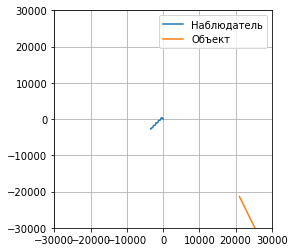

-377.15061778211987
(3, 901)


In [27]:
env.tma.plot_trajectories()
print(sum_r)
print(env.tma.observer_data.shape)

In [28]:
print(env.tma.mle_algorithm_v6([1,1,1,1]))

{'ММП v6': {'Истинные параметры': [135.46618141178004, 30, 153.73076308817662, 7.708449138359166], 'Полученные параметры': [135.44055431542907, 29.41872844154511, 155.86293496218315, 6.945549278461165], 'Начальное приближение': [45.0, 1.4142135623730951, 45.0, 1.4142135623730951], 'Оценка': [0.0102313797386018, 0.3394271997575888, 1], 'Число вычислений функции, число итераций': [18, 17], 'Среднеквадратичное отклонение параметров': array([0.72625781, 0.75312003, 0.83353281, 0.8510329 ]), 'Время работы': [0.0055592999999589665]}}
